In [1]:
import datetime
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

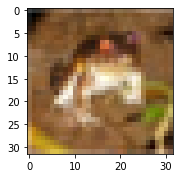

In [4]:
plt.figure(figsize=(22,22))
plt.subplot(432+288+1)
plt.imshow(X_train[0])

In [5]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [6]:
y_train_cat[:5], y_train[:5]

(array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[6],
        [9],
        [9],
        [4],
        [1]], dtype=uint8))

In [7]:
X_train_scl = X_train / 255
X_test_scl = X_test / 255

In [8]:
X_train[0].shape, 32*32*3

((32, 32, 3), 3072)

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
#     keras.layers.Dense(2000,activation= 'relu'),
    keras.layers.Dense(100,activation= 'relu'),
    keras.layers.Dense(10,activation= 'sigmoid')
])

# log_dir = "logs/fit/60epocs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [22]:
# model.fit(X_train_scl, y_train_cat, epochs=60, callbacks=[tensorboard_callback])
model.fit(X_train_scl, y_train_cat, epochs=60)

Epoch 1/60
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0116 - accuracy: 0.2665
Epoch 2/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7453 - accuracy: 0.3839
Epoch 3/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6627 - accuracy: 0.4112
Epoch 4/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6116 - accuracy: 0.4340
Epoch 5/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5726 - accuracy: 0.4471
Epoch 6/60
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5478 - accuracy: 0.4553
Epoch 7/60
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5208 - accuracy: 0.4691
Epoch 8/60
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4931 - accuracy: 0.4753
Epoch 9/60
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4615 - accuracy: 0.4889
Epoch 10/60
1563/1563 [==============================] - 3s 2ms/step - loss: 1.444

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_scl, y_test_cat)

In [79]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets
